In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
df = files.upload()
for fn in df.keys():
  print(' df file {name} with length {length} bytes'.format( name = fn, length=len(df[fn])))

Saving diabetes.csv to diabetes.csv
 df file diabetes.csv with length 23875 bytes


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

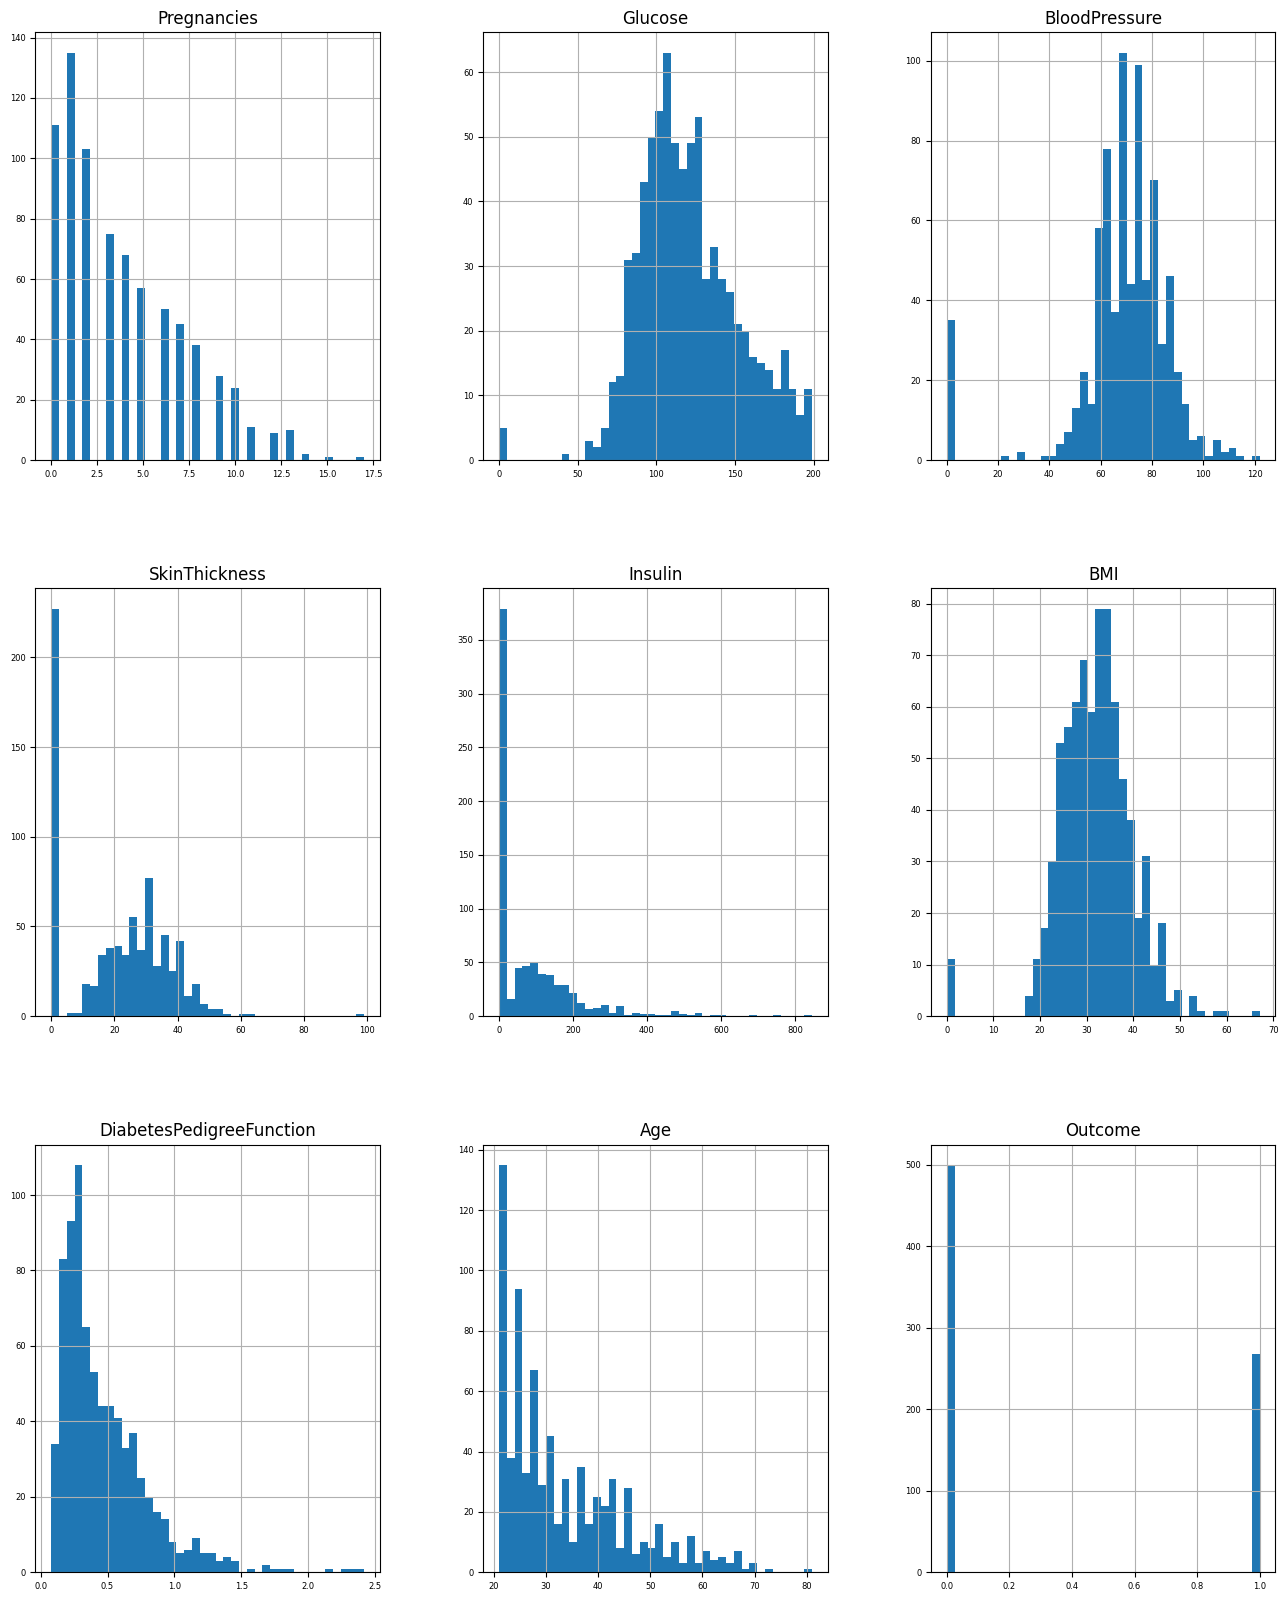

In [ ]:
df.hist(figsize = (16, 20), bins=40, xlabelsize=6, ylabelsize=6)

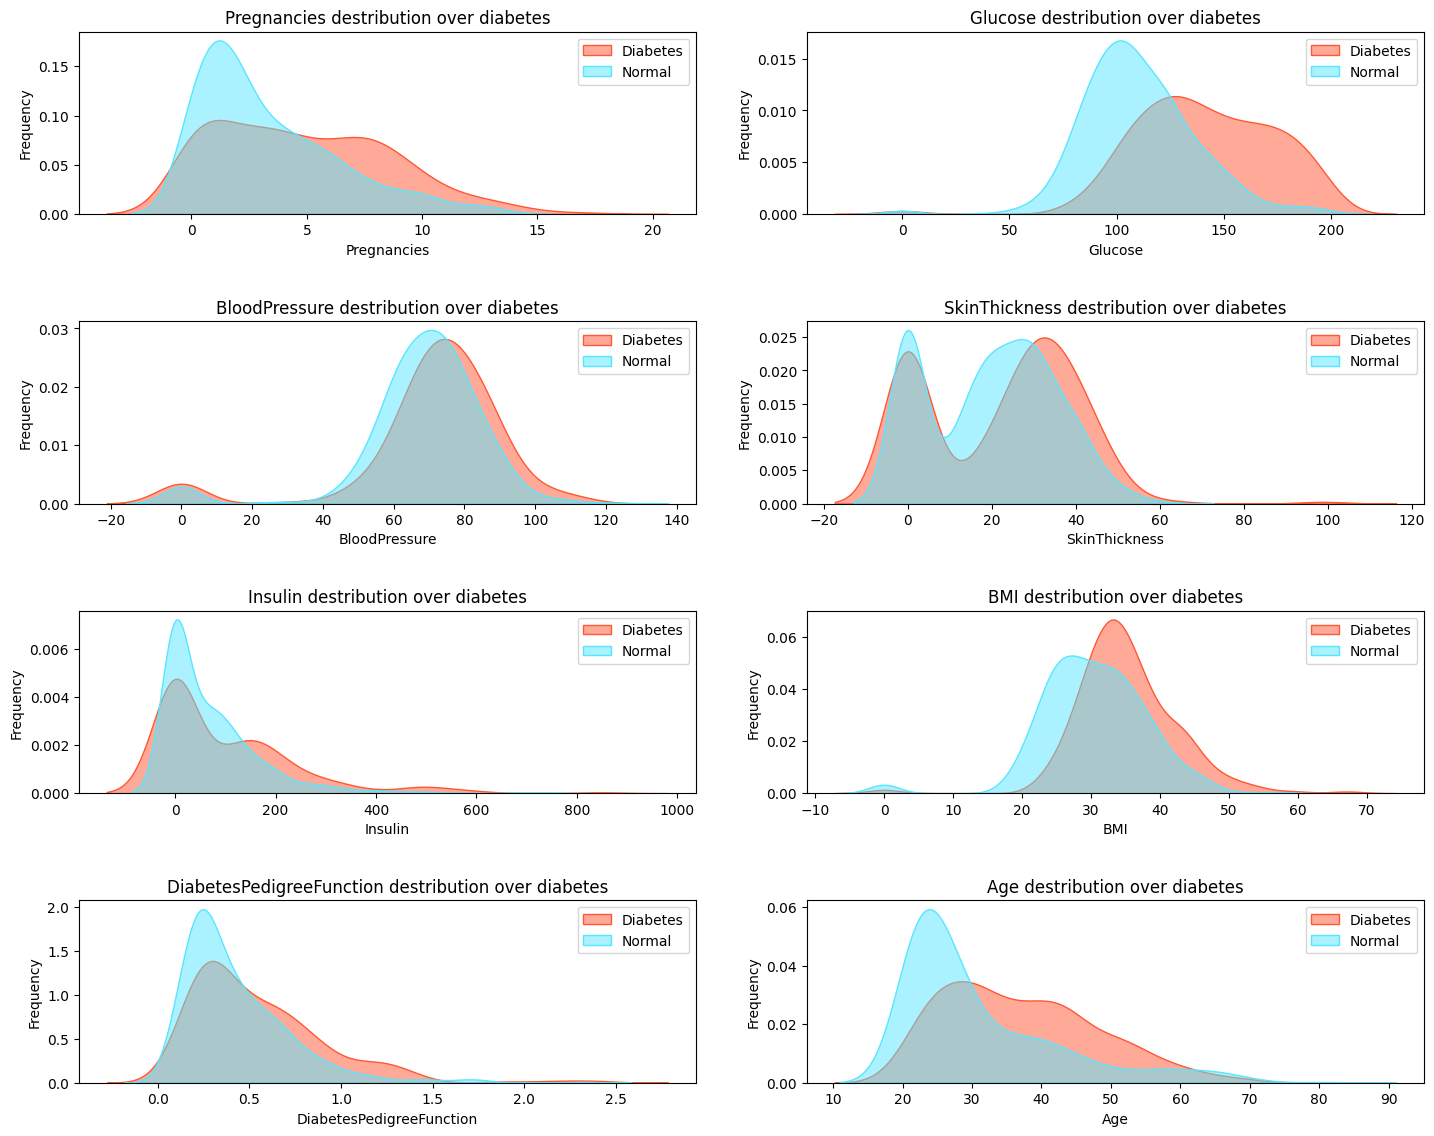

In [ ]:
fig, axes = plt.subplots(nrows=len(df.columns) // 2, ncols = 2, figsize = (15, 12))
for idx, column in enumerate(df.drop(columns='Outcome')):
  row_idx = idx // 2
  col_idx = idx % 2

  sns.kdeplot(df[df['Outcome'] == 1][column], alpha = 0.5, fill=True, color='#FF5733', label='Diabetes', ax = axes[row_idx, col_idx])
  sns.kdeplot(df[df['Outcome'] == 0][column], alpha = 0.5, fill=True, color='#57E6FF', label='Normal', ax = axes[row_idx, col_idx])

  axes[row_idx, col_idx].set_xlabel(column)
  axes[row_idx, col_idx].set_ylabel('Frequency')
  axes[row_idx, col_idx].set_title(f'{column} destribution over diabetes')
  axes[row_idx, col_idx].legend()

plt.tight_layout(pad=3)
plt.show()

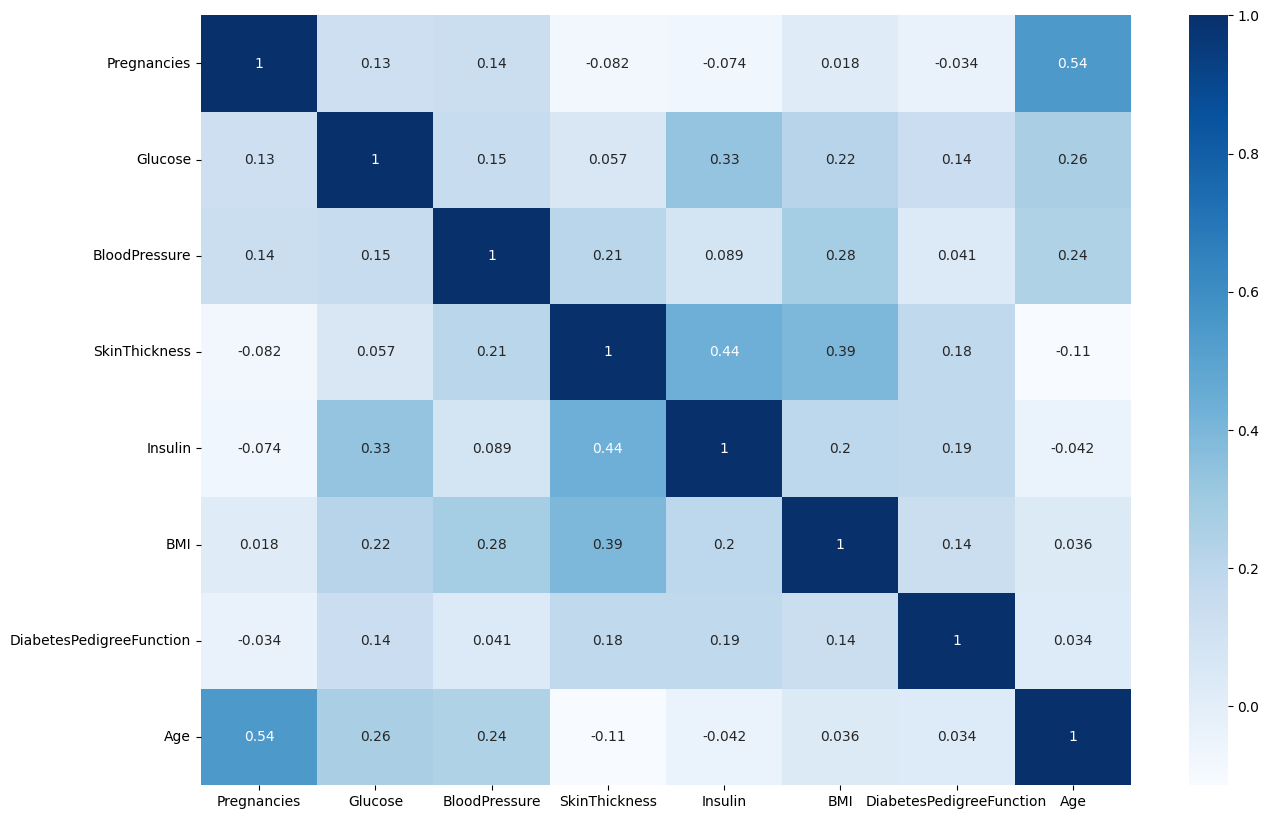

In [ ]:
corr = df.drop(columns= 'Outcome').corr()
fig, ax = plt.subplots(figsize= (15, 10))
sns.heatmap(corr, annot =True, ax=ax, cmap='Blues')
plt.show()

In [ ]:
X = df.drop(columns = 'Outcome')
target = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size= 0.2, random_state= 42)

In [ ]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = [RandomForestClassifier(), SVC(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier()]

In [ ]:
for m in models:
  print(m)
  m.fit(X_train, y_train)
  print(m, m.score(X_train, y_train))
  y_pred = m.predict(X_test)
  print(classification_report(y_test, y_pred))
  print('_'*60)

RandomForestClassifier()
RandomForestClassifier() 0.998371335504886
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

____________________________________________________________
SVC()
SVC() 0.8338762214983714
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

____________________________________________________________
LogisticRegression()
LogisticRegression() 0.7703583061889251
              precision    recall  f1-score   support

         

RandomForest is the best model